Objectif : proposer une optimisation de portefeuille en terme d'allocation (poids). 
- Pour cela, on proposera un cadre d'allocation qui minimise le ratio de Sharpe, qui se définit comme étant une mesure du risk/reward du portefeuille.

Description : Riskfolio-Lib est une bibliothèque pour réaliser des allocations d'actifs stratégiques quantitatives ou des optimisations de portefeuilles en Python. Elle est construite sur cvxpy et intégrée étroitement avec les structures de données pandas. La fonction SciPy minimize(method=’SLSQP’) minimise une fonction scalaire de plusieurs variables en utilisant la programmation séquentielle des moindres carrés (SLSQP). MPT PO est basé sur des simulations Monte Carlo pour la recherche d'optimisation du ratio de Sharpe maximum pour un niveau de risque de marché donné, soulignant que le risque est une partie inhérente à une récompense plus élevée. Le rééquilibrage de portefeuille est une technique qui consiste à ajuster dynamiquement l'allocation des actifs pour la maintenir en ligne avec les objectifs d'investissement. pyfolio est une bibliothèque Python pour l'analyse de la performance et du risque des portefeuilles financiers, développée par Quantopian Inc. Elle fonctionne bien avec la bibliothèque de backtesting open source Zipline.

In [11]:
import	numpy	as	np
import	pandas	as	pd
import	yfinance	as	yf
import	matplotlib.pyplot	as	plt
import	warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format	=	'{:.4%}'.format

#Titres detenus dans le portefeuille du gérant

assets	= ['DELL',	'ABNB',	'PANW',	'BKNG',	'UBER',	'IBM',	'SCCO',	'ADBE',
 'NFLX',	'TXN',	'ORCL',	'TTD',	'MU',	'PYPL',	'INTC',
 'GOOG',	'MSFT',	'NVDA',	'AMZN',	'META',	'TSLA',	'AAPL',	'AMD',	'CRM']

len(assets)
25
 
# Période
start	=	'2020-01-01'
end	=	'2024-07-26'

# Data téléchargement
data = yf.download(assets,	start	=	start,	end	=	end)
data = data.loc[:,('Adj Close',	slice(None))]
data.columns = assets

#	Calculating	returns
Y =	data[assets].pct_change().dropna()

[*********************100%%**********************]  24 of 24 completed


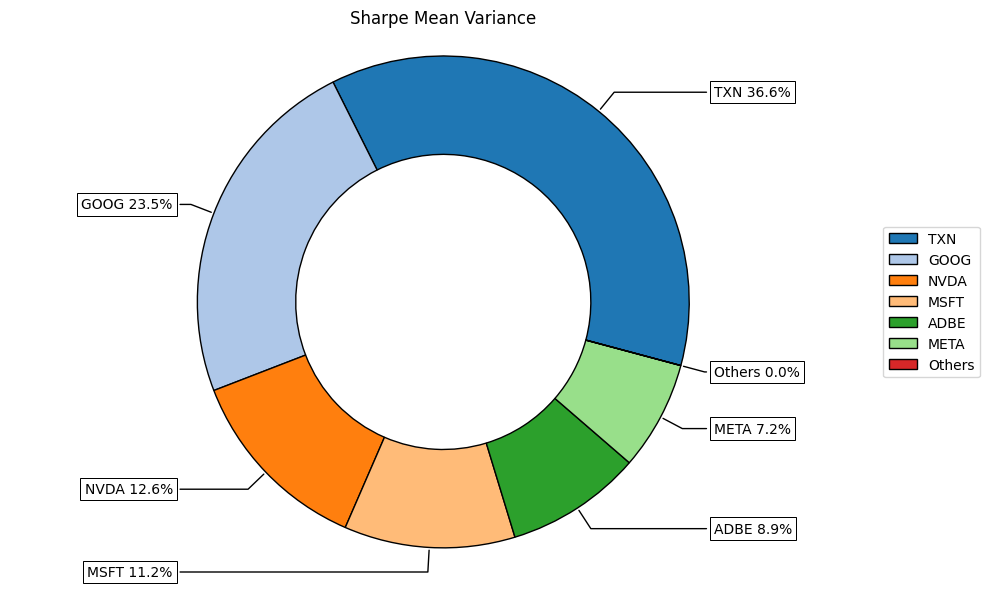

In [5]:
# Estimation du cadre moyenne - variance

import	riskfolio	as	rp

# Building the	portfolio	object
port = rp.Portfolio(returns=Y)

# Calcul du portefeuille optimal
method_mu='hist'	#	Méthode d’estimation des rendements attendus sur la base de données historiques.
method_cov='hist'	#	Méthode d’estimation de la matrice de covariance basée sur des données historiques.
port.assets_stats(method_mu=method_mu,	method_cov=method_cov)

# Estimation du portefeuille optimal

model='Classic' #Could	be	Classic	(historical),	BL	(Black	Litterman)	or	FM	(Factor	Model)
rm	= 'MV'	 #Risk	measure	used (ici cadre moyenne-var)
obj	= 'Sharpe'	#Objective	function,	could	be	MinRisk,	MaxRet,	Utility	or	Sharpe
hist = True	 #Use	historical	scenarios	for	risk	measures	that	depend	on	scenarios
rf = 0  #Risk	free	rate
l = 0  #Risk	aversion	factor,	only	useful	when	obj	is	'Utility'
w = port.optimization(model=model,	rm=rm,	obj=obj,	rf=rf,	l=l,	hist=hist)

#	Visualisation de la composition du portefeuille
 
ax	= rp.plot_pie(w=w,	title='Sharpe Mean Variance',	others=0.05,	nrow=25,	cmap	=	"tab20",
        height=6,	width=10,	ax=None)

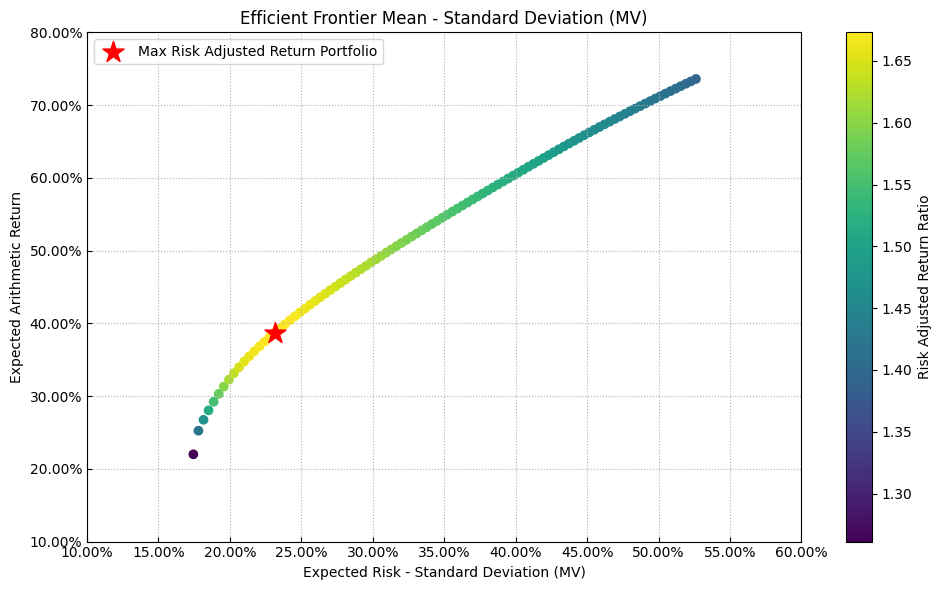

In [7]:
#Calcul de la frontière efficiente issus du cadre : Théorie Moderne du Portefeuille - 1952 H.Markowitz

points	=	100	#	Nombre de points de la frontière
frontier	=	port.efficient_frontier(model=model, rm=rm,	points=points, rf=rf, hist=hist)

# Plotting the efficient frontier
label	=	'Max Risk Adjusted Return Portfolio'

mu	=	port.mu	#	Expected	returns
cov	=	port.cov	#	Covariance	matrix
returns	=	port.returns	#	Returns	of	the	assets
ax	=	rp.plot_frontier(w_frontier=frontier,	mu=mu,	cov=cov,	returns=returns,	rm=rm,
rf=rf,	alpha=0.05,	cmap='viridis',	w=w,	label=label,
marker='*',	s=16,	c='r',	height=6,	width=10,	ax=None)

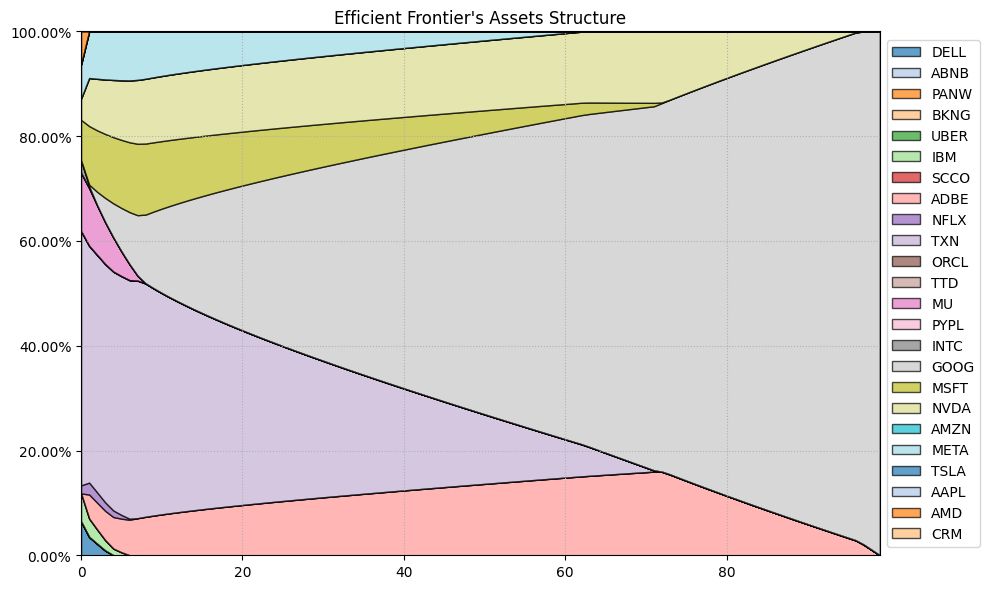

In [8]:
#	Plot de la composition efficace de la frontière

ax	= rp.plot_frontier_area(w_frontier=frontier,	cmap="tab20",	height=6,	width=10,	ax=None)

In [10]:
 #Calculate	Optimal	Portfolios	for	Several	Risk	Measures
 
 #	Risk	Measures	available:
 #	'MV':	Standard	Deviation.
 #	'MAD':	Mean	Absolute	Deviation.
 #	'MSV':	Semi	Standard	Deviation.
 #	'FLPM':	First	Lower	Partial	Moment	(Omega	Ratio).
 #	'SLPM':	Second	Lower	Partial	Moment	(Sortino	Ratio).
 #	'CVaR':	Conditional	Value	at	Risk.
 #	'EVaR':	Entropic	Value	at	Risk.
 #	'WR':	Worst	Realization	(Minimax)
 #	'MDD':	Maximum	Drawdown	of	uncompounded	cumulative	returns	(Calmar	Ratio).
 #	'ADD':	Average	Drawdown	of	uncompounded	cumulative	returns.
 #	'CDaR':	Conditional	Drawdown	at	Risk	of	uncompounded	cumulative	returns.
 #	'EDaR':	Entropic	Drawdown	at	Risk	of	uncompounded	cumulative	returns.
 #	'UCI':	Ulcer	Index	of	uncompounded	cumulative	returns.

rms	=	['MV',	'MAD',	'MSV',	'FLPM',	'SLPM',	'CVaR','EVaR',	'WR',	'MDD',	'ADD',	'CDaR',	'UCI',	'EDaR']
w_s	=	pd.DataFrame([])

for	i	in	rms:
    w	=	port.optimization(model=model,	rm=i,	obj=obj,	rf=rf,	l=l,	hist=hist)
    w_s	=	pd.concat([w_s,	w],	axis=1)

w_s.columns	=	rms
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
DELL,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ABNB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
PANW,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BKNG,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
UBER,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
IBM,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
SCCO,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ADBE,8.95%,12.35%,9.34%,12.79%,9.01%,9.30%,2.95%,1.20%,0.00%,7.73%,5.45%,7.90%,1.46%
NFLX,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
TXN,36.57%,37.70%,34.84%,38.70%,34.57%,32.36%,24.34%,20.46%,64.12%,54.58%,64.19%,58.53%,64.61%


<Axes: >

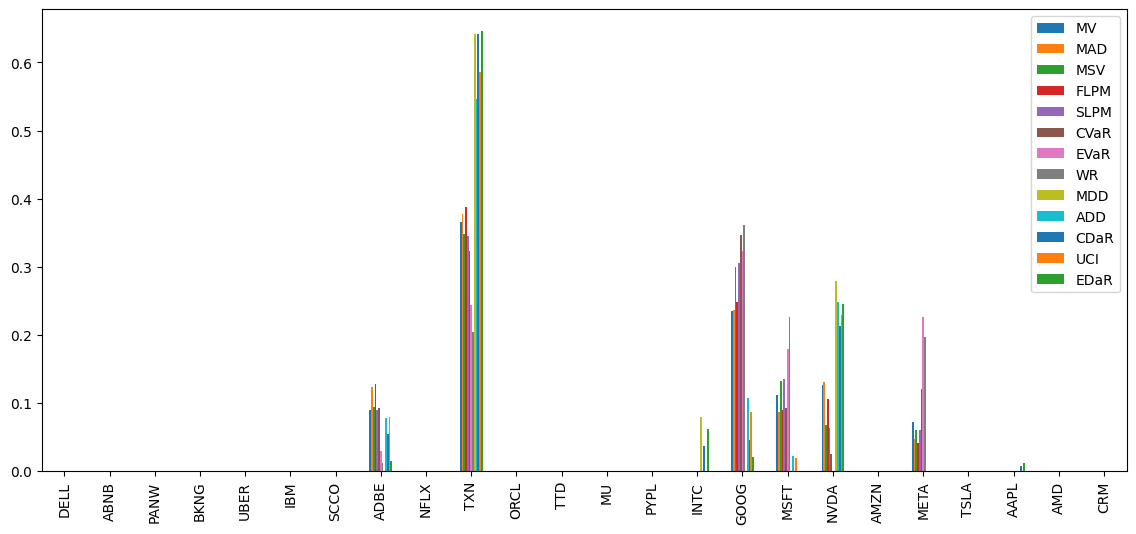

In [12]:
 #	Comparing	asset	allocation	weights	for	different	risk	measures

 fig	=	plt.gcf()
 fig.set_figwidth(14)
 fig.set_figheight(6)
 ax	=	fig.subplots(nrows=1,	ncols=1)
 w_s.plot.bar(ax=ax)

In [23]:
# Recherche aléatoire MPT du portefeuille Max Sharpe Ratio
# Mise en œuvre d’une recherche aléatoire du Ratio de Sharpe [2]

import	quandl
%matplotlib inline

#Optimization method - Randomization
df=data.copy()
print('The	stocks	are:	',df.columns)
np.random.seed(200)
weights	=	np.array(np.random.random(len(assets)))
weights	=	weights/np.sum(weights)
print('Random weights: ',weights)

The	stocks	are:	 Index(['DELL', 'ABNB', 'PANW', 'BKNG', 'UBER', 'IBM', 'SCCO', 'ADBE', 'NFLX',
       'TXN', 'ORCL', 'TTD', 'MU', 'PYPL', 'INTC', 'GOOG', 'MSFT', 'NVDA',
       'AMZN', 'META', 'TSLA', 'AAPL', 'AMD', 'CRM'],
      dtype='object')
Random weights:  [0.06495777 0.01552925 0.04074598 0.02935947 0.05237989 0.00019609
 0.02450048 0.06235726 0.03126319 0.06730007 0.05945511 0.06758967
 0.06328758 0.0208174  0.05799823 0.00830946 0.05384925 0.01717148
 0.00658259 0.0646739  0.05662363 0.03552986 0.05987622 0.03964618]


In [24]:
#	Calculating	the	asset	log	daily	returns,	covariance,	expected	annual	return/volatility,	and	Sharpe	ratio
 
log_returns	=	np.log(df/df.shift(1))
log_returns.cov()
expected_return	= np.sum((log_returns.mean()*	weights) * 252)
expected_return
expected_vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
expected_vol
sharpe_r = expected_return/expected_vol
sharpe_r

0.6565340520786968

In [28]:
 #	Finding	max	Sharpe	ratio

 np.random.seed(200)

# Initalization	of variables
portfolio_number = 10000
weights_total = np.zeros((portfolio_number,len(df.columns)))
returns = np.zeros(portfolio_number)
volatility = np.zeros(portfolio_number)
sharpe	= np.zeros(portfolio_number)

 for	i	in	range(portfolio_number):
 #Random	weights
    weights	=	np.array(np.random.random(len(assets)))
    weights	=	weights/np.sum(weights)
     
#	Append	weight
    
    weights_total[i,:]	= weights
#	Expected	return
    
    returns[i]	=	np.sum((log_returns.mean()*	weights)	*	252)
#	Expected	volume
    volatility[i]	=	np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
#	Sharpe	ratio
    sharpe[i]	= returns[i]/volatility[i]

max_sharpe	=	sharpe.max()
max_sharpe

0.8116753401667512

In [29]:
max_sharpe_index = sharpe.argmax()
max_sharpe_weights = weights_total[6117,:]

In [31]:
max_sharpe_weights

array([0.05285369, 0.03216869, 0.08029375, 0.06199209, 0.06066546,
       0.07642589, 0.03063091, 0.05039281, 0.0701932 , 0.07157153,
       0.0505994 , 0.03576264, 0.04406861, 0.04646853, 0.00359899,
       0.00362649, 0.04680603, 0.05949778, 0.02884259, 0.0145591 ,
       0.01746865, 0.02568565, 0.01243757, 0.02338995])

In [33]:
max_sharpe_index

4827

In [40]:
max_sharpe_return = returns[max_sharpe_index]
max_sharpe_vol = volatility[max_sharpe_index]

In [41]:
max_sharpe_return

0.25141623262749535

In [39]:
max_sharpe_vol

0.3097497486813437

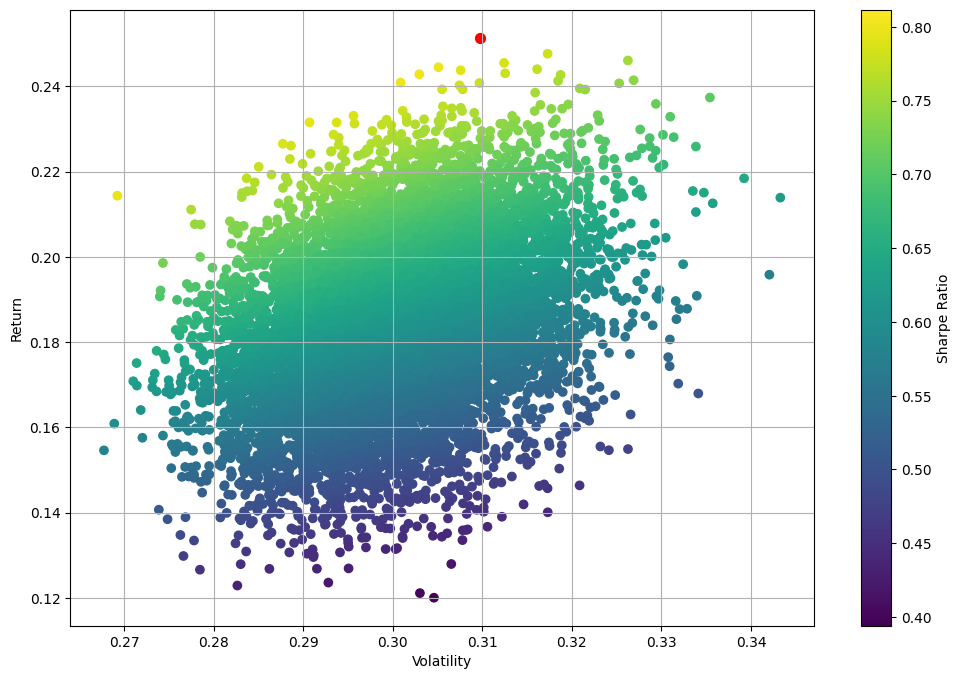

In [43]:
plt.figure(figsize=(12,8))
plt.scatter(volatility,returns,c=sharpe)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.grid()
plt.scatter(max_sharpe_vol,max_sharpe_return,c='red',s=50)